In [553]:
import pandas as pd
import numpy as np
from sklearn.cluster import HDBSCAN
from umap import UMAP

DATAPATH = "../dataframes/experiment3/MG_3_components_3.csv"

df = pd.read_csv(DATAPATH, index_col=0)
df_test = df.loc[(df["split"] == "test")] #  & (~df["faint"])
columns = [f"percentile_{i}" for i in np.arange(5,100,5)]

In [533]:
X_test = df_test[columns]
index = X_test.index
X_test.shape
hdb = HDBSCAN(min_cluster_size=100, min_samples=15) # min_cluster_size=500,  min_samples=50
cluster = hdb.fit_predict(X_test)
X_test["cluster"] = cluster
df.loc[index, "cluster"] = cluster

/tmp/ipykernel_2601936/4120627617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["cluster"] = cluster


In [534]:
X_test["cluster"].value_counts()

cluster
-1    10215
 5     8632
 6     1444
 4     1140
 1      242
 2      217
 3      161
 0      114
Name: count, dtype: int64

In [528]:
from sklearn.manifold import TSNE

In [541]:
# X_test_embedded = TSNE(n_components=2, perplexity=95, max_iter=1000, n_jobs=-1).fit_transform(X_test.iloc[:, :-1])
X_test_embedded = UMAP(n_components=2).fit_transform(X_test.iloc[:, :-1])
X_test_embedded = pd.DataFrame(X_test_embedded, columns=["x1", "x2"])

In [561]:
X_test_embedded["cluster"] = cluster
X_test_embedded["cluster"] = X_test_embedded["cluster"].astype(str)
X_test_embedded["Z_pred"] = df_test["Z_pred"].values
X_test_embedded

,x1,x2,cluster,Z,Z_pred
0,1.311034,-6.859697,5,NaN,1.530469
1,2.269037,-4.026850,-1,NaN,1.531365
2,13.533808,-4.299663,5,NaN,1.923877
3,10.156172,4.170537,-1,NaN,2.221977
4,14.365646,10.064885,6,NaN,2.593690
...,...,...,...,...,...
22160,9.964083,0.074636,-1,NaN,1.971400
22161,-3.183134,-2.441735,5,NaN,1.259450
22162,12.369076,-7.498541,5,NaN,1.867162
22163,10.638256,-8.262423,5,2.518382,1.832911


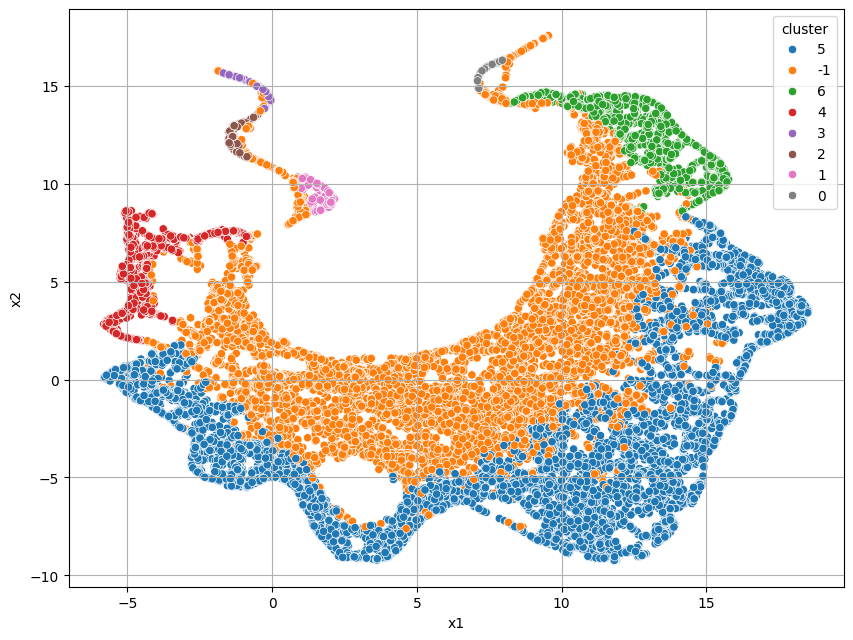

In [571]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7.5))
sns.scatterplot(data=X_test_embedded, x="x1", y="x2", hue="cluster", palette="tab10")
plt.grid(True)
# plt.savefig("tsne.png")

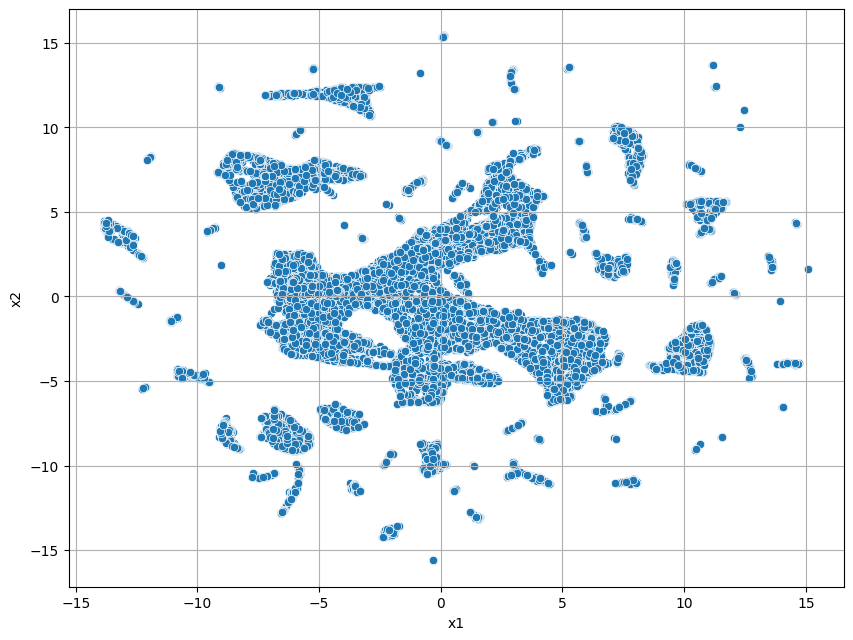

In [393]:
plt.figure(figsize=(10,7.5))
sns.scatterplot(data=X_test_embedded, x="x1", y="x2")
plt.grid(True)

In [540]:
df.to_csv(DATAPATH)

In [218]:
# X_test.loc[X_test["cluster"] == 2].describe()

In [158]:
from sklearn.decomposition import PCA

X_test_embedded = PCA(n_components=20).fit_transform(X_test.iloc[:, :-1])
hdb = HDBSCAN(min_cluster_size=50, n_jobs=-1)
cluster = hdb.fit_predict(X_test_embedded)

X_test_embedded = TSNE(n_components=2, n_jobs=-1).fit_transform(X_test_embedded)
X_test_embedded = pd.DataFrame(X_test_embedded, columns=["x1", "x2"])
X_test_embedded["cluster"] = cluster
X_test_embedded["cluster"] = X_test_embedded["cluster"].astype(str)

In [159]:
X_test_embedded["cluster"].value_counts()

cluster
-1    9037
6     1235
1     1063
5      871
9      505
7      392
8      375
2      227
10     211
3      144
4      128
0       72
Name: count, dtype: int64

In [323]:
X_test["cluster"]

75         5
155        5
318        0
445        5
2053       5
          ..
2648341    3
2648550    5
2648849    5
2649006    6
2649069    6
Name: cluster, Length: 14260, dtype: int64